# Advanced Regression

### Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

   - Which variables are significant in predicting the price of a house, and
   - How well those variables describe the price of a house.
    
Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# import all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
# surpass warnings
import warnings
warnings.filterwarnings('ignore')

## Understanding the data

In [2]:
#reading the file
df = pd.read_csv('train.csv')

In [3]:
# pd.set_option('display.max_columns', None)
#looking the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#finding the shape
df.shape

(1460, 81)

The dataset contains `81` columns and `1460` rows

In [5]:
#inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [6]:
#finding the null values percentage
pd.set_option('display.max_rows', None)
print(100*df.isnull().sum()/len(df.index))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

**we can see there are some columns with huge null percentage. So imputing object columns nulls with None.**

In [7]:
#taking the object datatype columns
obj_nulls = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
             'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Electrical']

In [8]:
#seeing the values in object columns
for i in obj_nulls:
    print(df[i].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
G

In [9]:
#Imputing values by looking at the data dictionary provided to us 
#and data distribution across different columns

# based on data dictionary na in Alley means 'No alley access'
df.loc[df['Alley'].isnull(),['Alley']] = 'No alley access'

# LotFrontage can never be 0. So imputing it with mean value
df.loc[df['LotFrontage'].isnull(),['LotFrontage']] = df['LotFrontage'].mean()

# based on data dictionary na in MasVnrType means 'none'
df.loc[df['MasVnrType'].isnull(),['MasVnrType']] = 'none'

# based on data dictionary where MasVnrType type is 'none' area will 0
df.loc[df['MasVnrArea'].isnull(),['MasVnrArea']] = 0

# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
df.loc[df['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
df.loc[df['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
df.loc[df['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
df.loc[df['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
df.loc[df['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'

# based on data dictionary na in FireplaceQu means 'No Fireplace'
df.loc[df['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'

# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
df.loc[df['GarageType'].isnull(),['GarageType']] = 'No Garage'
df.loc[df['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
df.loc[df['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
df.loc[df['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

# based on data dictionary na in PoolQC means 'No Pool'
df.loc[df['PoolQC'].isnull(),['PoolQC']] = 'No Pool'

# based on data dictionary na in Fence means 'No Fence'
df.loc[df['Fence'].isnull(),['Fence']] = 'No Fence'

# based on data dictionary na in MiscFeature means 'none'
df.loc[df['MiscFeature'].isnull(),['MiscFeature']] = 'none'

# impute GarageYrBlt with 2019 so that while calculating age it will it will turn to 0
# age = 2019-2019 = 0
df.loc[df['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019

# impute electrical column with SBrkr as it is the most occuring value
df.loc[df['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [10]:
#finding null percentage after imputing
print(round(100*(df.loc[:, df.isnull().any()].isnull().sum())/len(df.index), 2))

Series([], dtype: float64)


**we can see there are no columns with nulls.**

In [11]:
# drop duplicate columns if any present in data set 
df = df.drop_duplicates()
df.shape

(1460, 81)

In [12]:
# So let's drop these columns as they won't be that usefull for analysis
df = df.drop(['Street','Utilities','PoolQC','Id'], axis=1)
df.shape

(1460, 77)

In [13]:
#describing the dataframe
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# taking all numeric (float and int) variables in the dataset
house_num = df.select_dtypes(include=['float64', 'int64'])
house_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# dropping the columns we want to treat as categorical variables
house_num = house_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_num.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


## Data visualisation

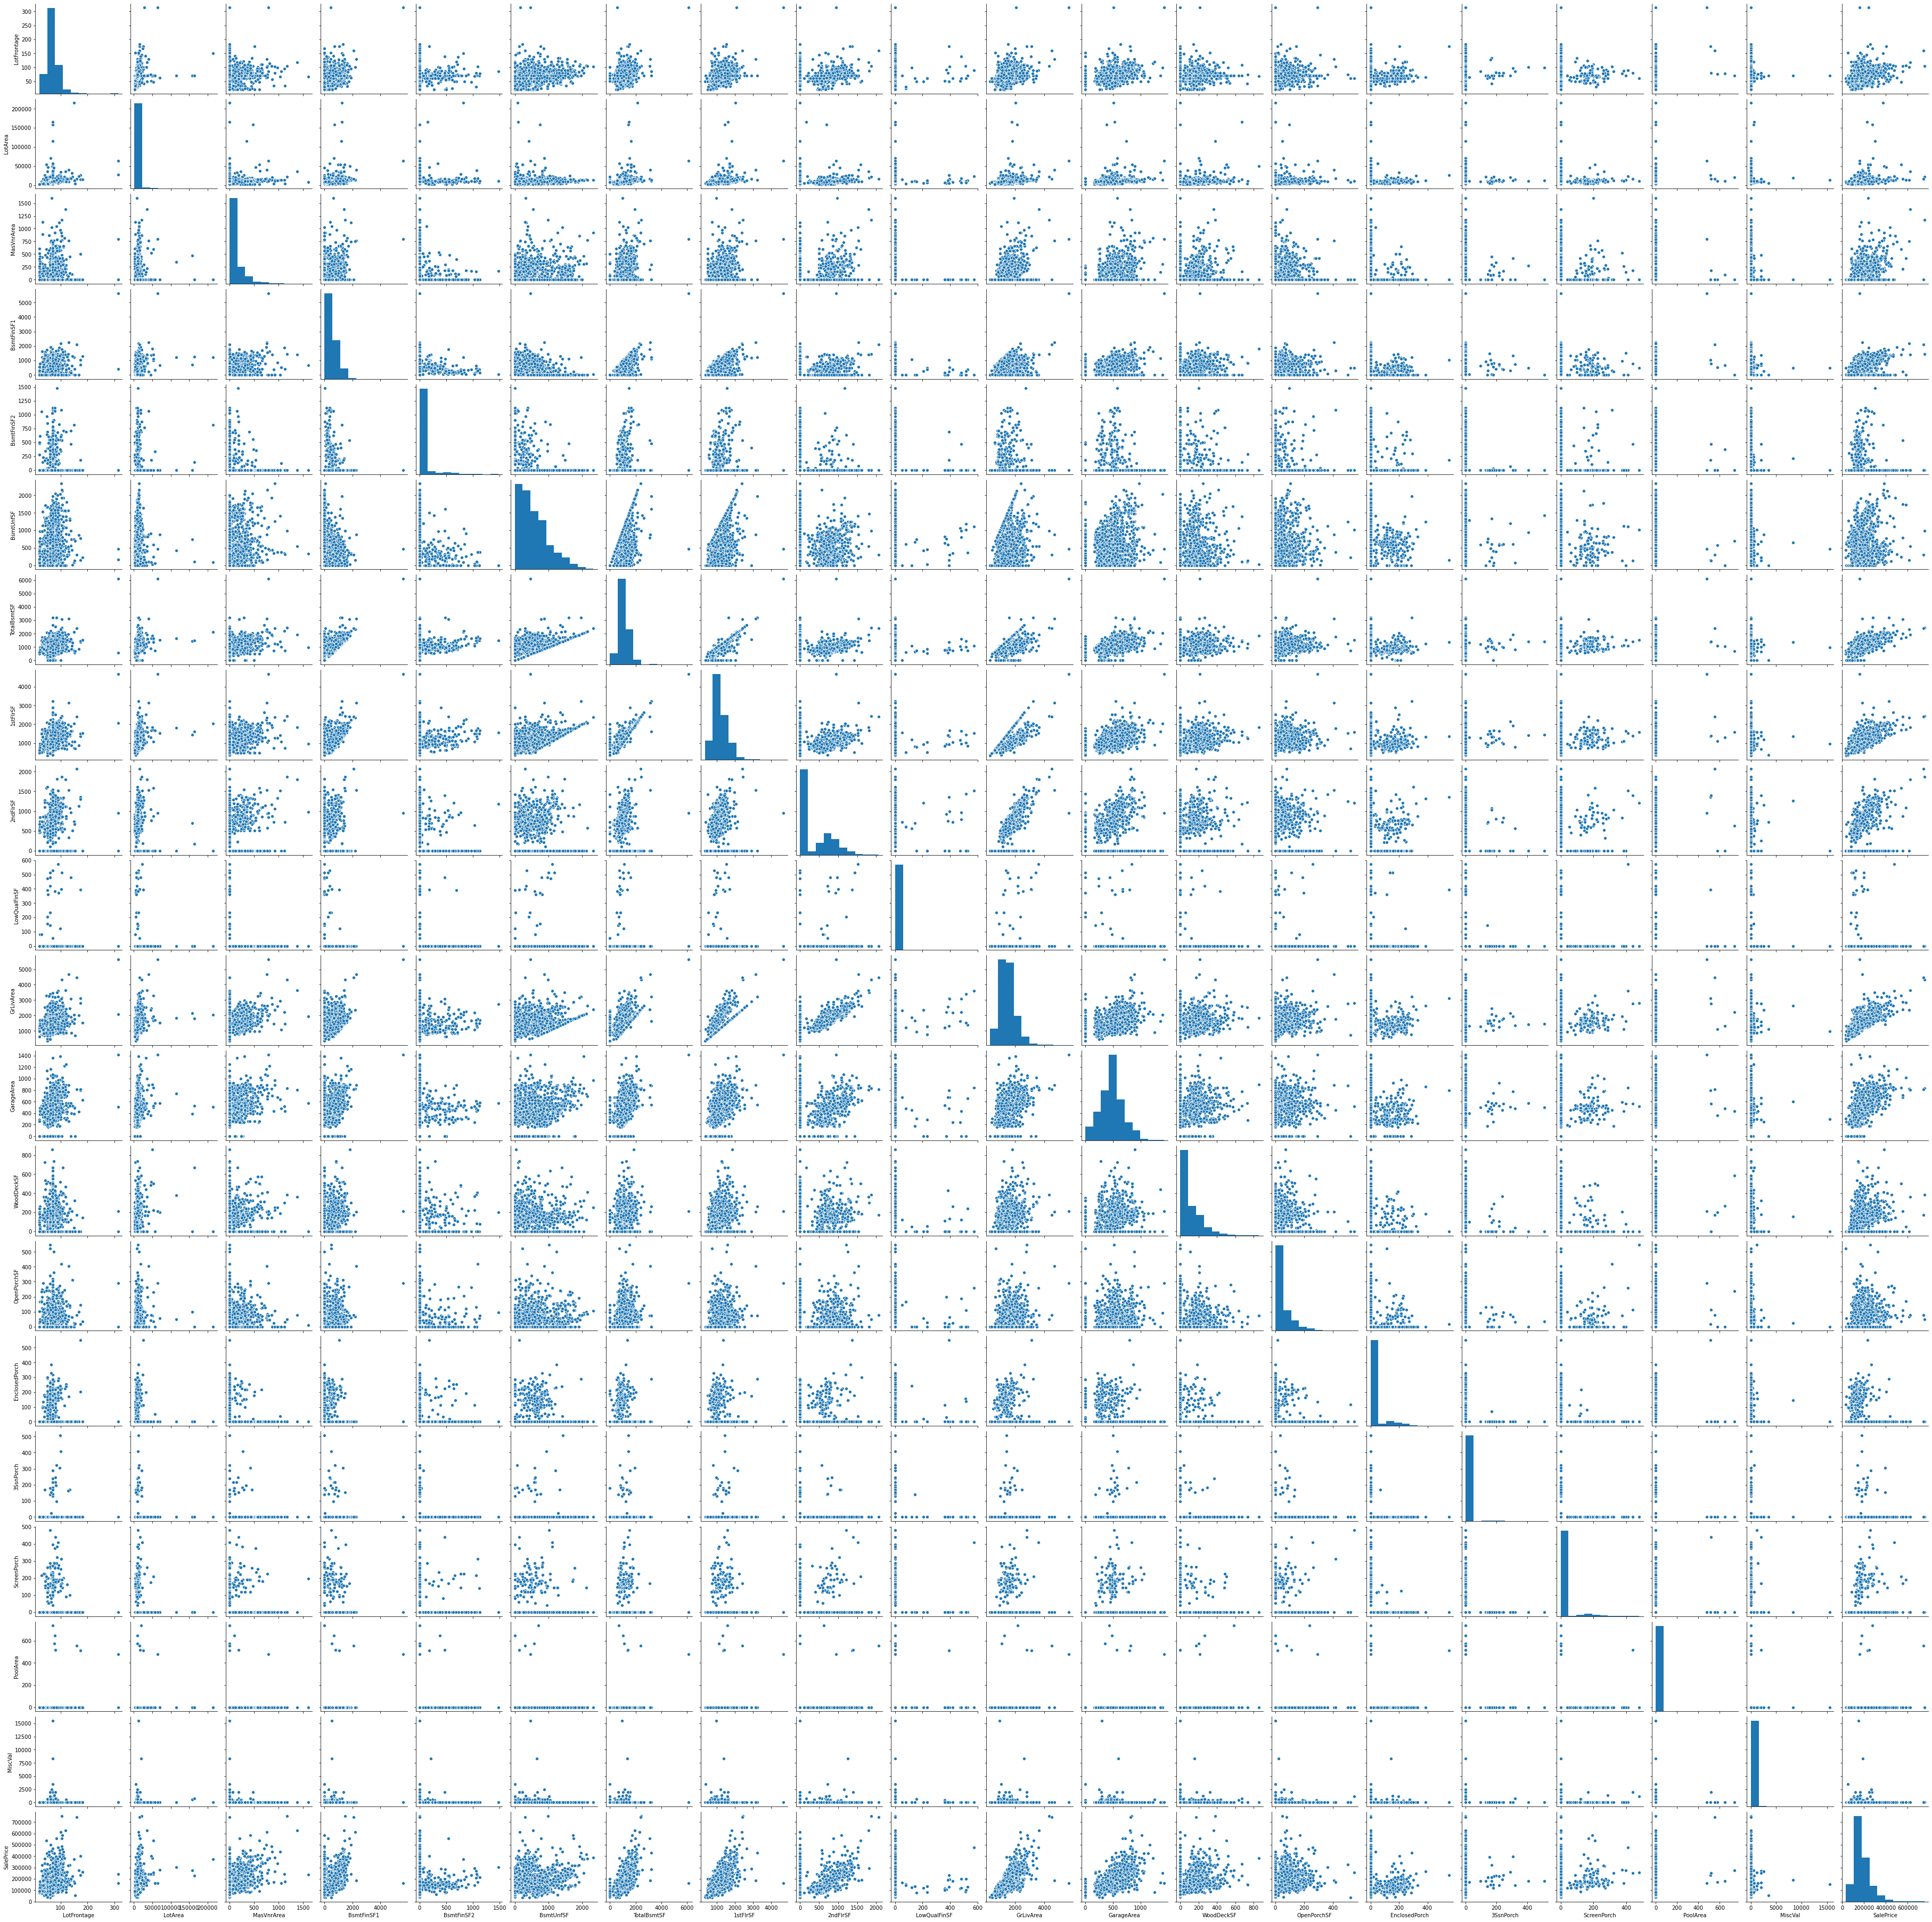

In [16]:
# paiwise scatter plot for all numeric columns
sns.pairplot(house_num)
plt.show()

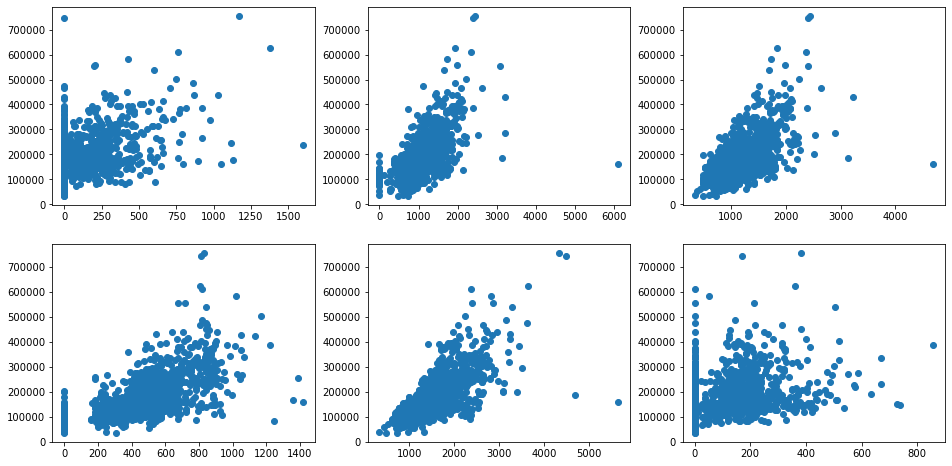

In [17]:
# Scatter plot of numerical variables with respect to target variable
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)
plt.show()

In [18]:
#checking for outliers
house_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.024023,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


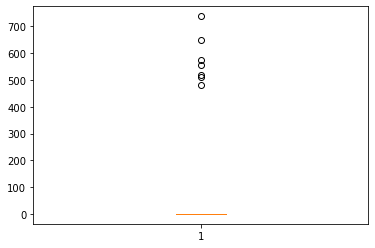

In [19]:
# outlier treatment
plt.boxplot(df['PoolArea'])
Q1 = df['PoolArea'].quantile(0.1)
Q3 = df['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['PoolArea'] >= Q1 - 1.5*IQR) &  (df['PoolArea'] <= Q3 + 1.5*IQR)]

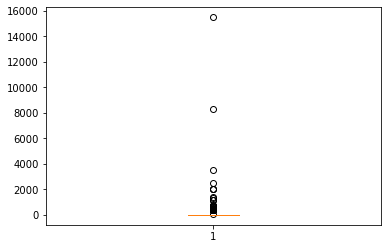

In [20]:
# outlier treatment
plt.boxplot(df['MiscVal'])
Q1 = df['MiscVal'].quantile(0.1)
Q3 = df['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['MiscVal'] >= Q1 - 1.5*IQR) & (df['MiscVal'] <= Q3 + 1.5*IQR)]

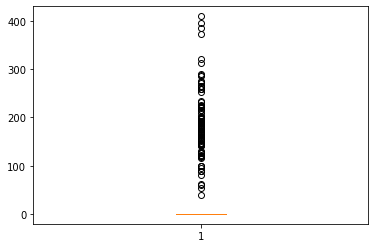

In [21]:
# outlier treatment
plt.boxplot(df['ScreenPorch'])
Q1 = df['ScreenPorch'].quantile(0.1)
Q3 = df['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['ScreenPorch'] >= Q1 - 1.5*IQR) & (df['ScreenPorch'] <= Q3 + 1.5*IQR)]

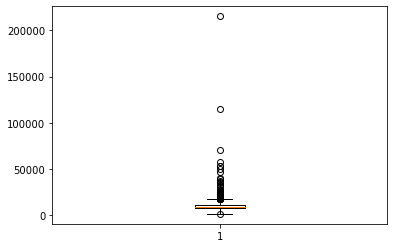

In [22]:
# outlier treatment
plt.boxplot(df['LotArea'])
Q1 = df['LotArea'].quantile(0.1)
Q3 = df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['LotArea'] >= Q1 - 1.5*IQR) & (df['LotArea'] <= Q3 + 1.5*IQR)]

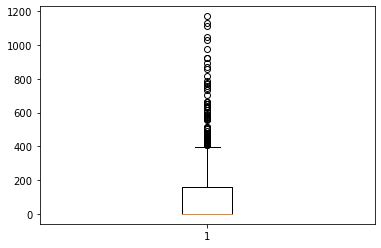

In [23]:
# outlier treatment
plt.boxplot(df['MasVnrArea'])
Q1 = df['MasVnrArea'].quantile(0.1)
Q3 = df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['MasVnrArea'] >= Q1 - 1.5*IQR) & (df['MasVnrArea'] <= Q3 + 1.5*IQR)]

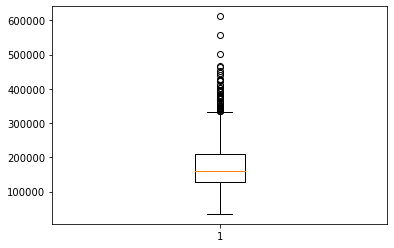

In [24]:
# outlier treatment
plt.boxplot(df['SalePrice'])
Q1 = df['SalePrice'].quantile(0.1)
Q3 = df['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5*IQR) & (df['SalePrice'] <= Q3 + 1.5*IQR)]

In [25]:
# Check number of row retained after outlier treatment
df.shape

(1260, 77)

In [26]:
# correlation matrix
cor = house_num.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.306795,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901
LotArea,0.306795,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.178699,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614
BsmtFinSF1,0.215828,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.043340,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.363358,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.414266,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.072483,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.036849,0.004779,-0.068628,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


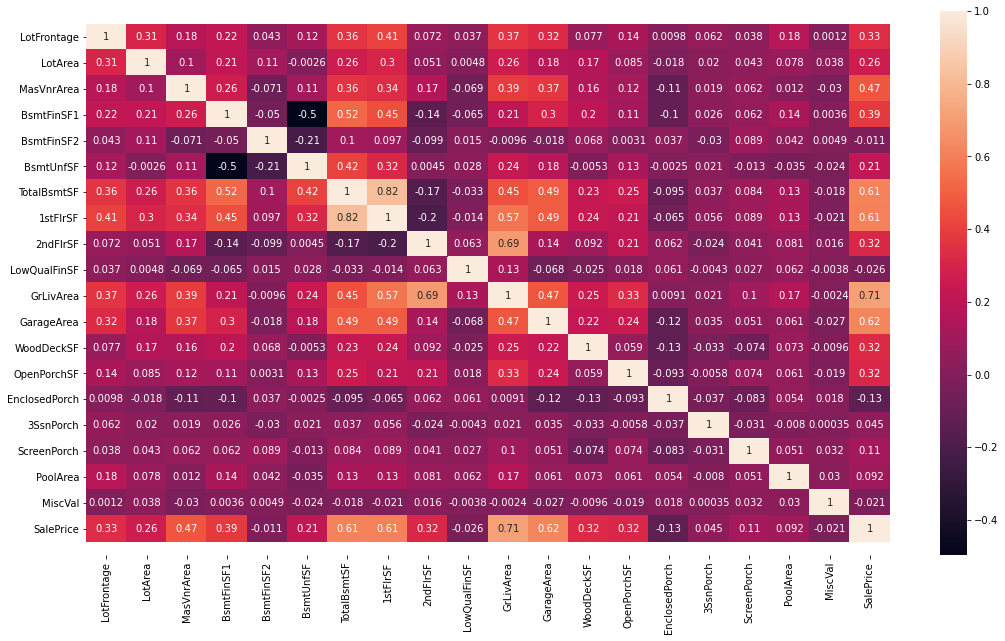

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [28]:
# Checking the target variable 'Salesprice'
df['SalePrice'].describe()

count      1260.000000
mean     175884.996825
std       70983.989942
min       34900.000000
25%      128000.000000
50%      159000.000000
75%      210000.000000
max      501837.000000
Name: SalePrice, dtype: float64

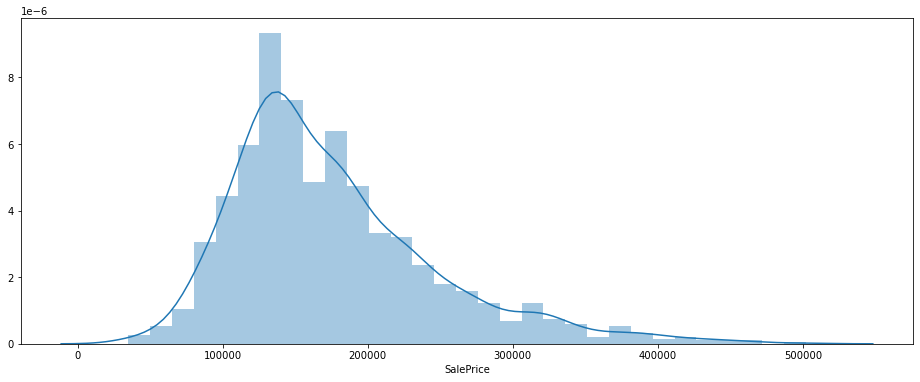

In [29]:
# positive skewness
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

## Data preparation

**Deriving some variables with respect to original variable**

In [30]:
# We can derive age using year columns
# derive house age = 2019 - year build
df["house_age"] = 2019 - df["YearBuilt"]
# derive house age when sold in month as we have month and year both for sold house
df["house_age_when_sold_in_month"] = (((df["YrSold"]-1) - df["YearBuilt"])*12) + df["MoSold"]
# derive garage age = 2019 - year build
df["garage_age"] = 2019 - df["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
df["gap_between_build_remodel"] = df["YearRemodAdd"] - df["YearBuilt"]

In [31]:
# check data frame after deriving columns
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_age,house_age_when_sold_in_month,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,16,50,16.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,43,365,43.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,18,81,18.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,104,1082,21.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,19,96,19.0,0


In [32]:
# Drop original year and month columns after deriving columns
df = df.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold'], axis=1)
df.shape

(1260, 76)

In [33]:
# split into X and y
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

X.shape, y.shape

((1260, 75), (1260,))

In [34]:
#replacing the values with 1,0
X['CentralAir'] = X['CentralAir'].replace({'Y': 1, "N": 0})
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,house_age,house_age_when_sold_in_month,garage_age,gap_between_build_remodel
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,16,50,16.0,0
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,No Fence,none,0,WD,Normal,43,365,43.0,0
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,No Fence,none,0,WD,Normal,18,81,18.0,1
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,No Fence,none,0,WD,Abnorml,104,1082,21.0,55
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,No Fence,none,0,WD,Normal,19,96,19.0,0


In [35]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.shape

(1260, 39)

In [36]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.shape

(1260, 210)

In [37]:
# drop original categorical variables after creating dummies
X = X.drop(list(house_categorical.columns), axis=1)

In [38]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [39]:
#finding shape 
X.shape

(1260, 246)

In [40]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [41]:
# Check data after scaling
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,...,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,0.220705,0.164684,0.309389,0.562963,0.568651,0.115593,0.219018,0.028626,0.267119,0.322618,...,0.003175,0.003968,0.084921,0.002381,0.865873,0.003175,0.007143,0.015079,0.819048,0.086508
std,0.252001,0.071752,0.143723,0.151362,0.137796,0.188192,0.219547,0.102875,0.206981,0.126166,...,0.056276,0.062894,0.278874,0.048756,0.340924,0.056276,0.084246,0.121917,0.385132,0.281224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.229146,0.444444,0.500000,0.000000,0.000000,0.000000,0.101602,0.246023,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.167979,0.299810,0.555556,0.500000,0.000000,0.186450,0.000000,0.227125,0.304117,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.195205,0.377846,0.666667,0.625000,0.194480,0.365678,0.000000,0.379238,0.395586,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model building

In [42]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [43]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# rfe
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [44]:
#checking rfe scores
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [45]:
#RFE columns
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [46]:
#taking columns selected by RFE into X
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [47]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -14891.678),
 ('MSSubClass', -10963.146),
 ('LotFrontage', -22429.494),
 ('LotArea', 38237.617),
 ('OverallQual', 63644.585),
 ('OverallCond', 39524.626),
 ('MasVnrArea', 8335.959),
 ('BsmtFinSF1', -1.703604786416764e+16),
 ('BsmtFinSF2', -1.3188621088129122e+16),
 ('BsmtUnfSF', -1.9263976392665456e+16),
 ('TotalBsmtSF', 2.868569824201038e+16),
 ('CentralAir', 479.5),
 ('1stFlrSF', -5.83125678373859e+16),
 ('2ndFlrSF', -3.663173750114649e+16),
 ('LowQualFinSF', -1.0638920462398028e+16),
 ('GrLivArea', 6.365217753929763e+16),
 ('BsmtFullBath', 7361.5),
 ('BsmtHalfBath', -10057.125),
 ('FullBath', 7434.0),
 ('HalfBath', 3810.5),
 ('BedroomAbvGr', -29375.625),
 ('KitchenAbvGr', -6246.75),
 ('TotRmsAbvGrd', 6475.0),
 ('Fireplaces', 10497.75),
 ('GarageCars', 20130.5),
 ('GarageArea', 22758.0),
 ('WoodDeckSF', 15543.875),
 ('OpenPorchSF', 11446.0),
 ('EnclosedPorch', 5433.875),
 ('3SsnPorch', 17369.391),
 ('ScreenPorch', -1.0675918765036276e+16),
 ('PoolArea', -490685917649798

### Lasso regression

In [48]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8993656846379975
0.8295906208324549


In [49]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 3417.794),
 ('MSSubClass', 48644.973),
 ('LotFrontage', 119126.56),
 ('LotArea', 55223.606),
 ('OverallQual', 42252.338),
 ('OverallCond', 118681.201),
 ('MasVnrArea', 118005.042),
 ('BsmtFinSF1', 97876.341),
 ('BsmtFinSF2', 28965.848),
 ('BsmtUnfSF', -57462.03),
 ('TotalBsmtSF', -65318.422),
 ('CentralAir', 30369.126),
 ('1stFlrSF', 38981.038),
 ('2ndFlrSF', -27797.979),
 ('LowQualFinSF', -30586.808),
 ('GrLivArea', 34108.055),
 ('BsmtFullBath', -40596.002),
 ('BsmtHalfBath', -39833.308),
 ('FullBath', -38711.911),
 ('HalfBath', -42002.881),
 ('BedroomAbvGr', 126885.532),
 ('KitchenAbvGr', 31691.884),
 ('TotRmsAbvGrd', -33660.29),
 ('Fireplaces', -133759.059),
 ('GarageCars', -95166.793),
 ('GarageArea', 42470.647)]

In [50]:
# Now let's do k fold with r2 score and tune hyper parameter
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024787,0.011689,0.003996,0.002524,0.0001,{'alpha': 0.0001},0.892527,0.854886,0.892421,0.862479,...,0.877266,0.015669,27,0.8964,0.90637,0.89965,0.900851,0.89769,0.900192,0.003451
1,0.014395,0.003200,0.004798,0.001597,0.001,{'alpha': 0.001},0.892527,0.854886,0.892421,0.862517,...,0.877274,0.015663,26,0.8964,0.90637,0.89965,0.900851,0.89769,0.900192,0.003451
2,0.011196,0.002991,0.004798,0.001600,0.01,{'alpha': 0.01},0.892528,0.854886,0.892419,0.862557,...,0.877292,0.015659,25,0.8964,0.90637,0.89965,0.900851,0.89769,0.900192,0.003451
3,0.008794,0.002989,0.004000,0.000002,0.05,{'alpha': 0.05},0.892531,0.854886,0.892411,0.862827,...,0.877367,0.015617,24,0.8964,0.90637,0.89965,0.900851,0.89769,0.900192,0.003451
4,0.008795,0.001598,0.002398,0.001958,0.1,{'alpha': 0.1},0.892535,0.854886,0.892401,0.863090,...,0.877433,0.015574,23,0.8964,0.90637,0.89965,0.900851,0.89769,0.900192,0.003451


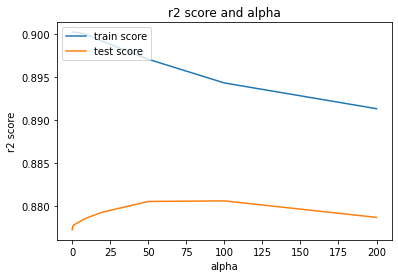

In [52]:
# plot to choose optimal value of aplha / hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
0.8806327024943844


**From both the plots we can see optimal value as `20`.**

In [54]:
# model with optimal alpha = 20
# lasso regression
lm = Lasso(alpha=20)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8976931950755321
0.8449870661368337


In [55]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 5411.375),
 ('MSSubClass', 48144.561),
 ('LotFrontage', 122159.6),
 ('LotArea', 52279.361),
 ('OverallQual', 41908.378),
 ('OverallCond', 111118.215),
 ('MasVnrArea', 121153.109),
 ('BsmtFinSF1', 95981.871),
 ('BsmtFinSF2', 28490.346),
 ('BsmtUnfSF', -56960.874),
 ('TotalBsmtSF', -3572.328),
 ('CentralAir', 29097.087),
 ('1stFlrSF', 19443.465),
 ('2ndFlrSF', -26928.488),
 ('LowQualFinSF', -10048.233),
 ('GrLivArea', 13884.829),
 ('BsmtFullBath', -30240.794),
 ('BsmtHalfBath', -38082.981),
 ('FullBath', -38671.531),
 ('HalfBath', -41726.206),
 ('BedroomAbvGr', 21978.937),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -4625.881),
 ('Fireplaces', -12015.275),
 ('GarageCars', -74680.924),
 ('GarageArea', 32495.559)]

With optimal value of 20. The R2 scores are - 
- Train - `0.8931745482517399`

- Test - `0.8422883803488737`

This shows model is not overfitted.

### Subjective question -1

**Changes in the model if we double the value of alpha.**

In [56]:
# model with optimal alpha = 40
# lasso regression
lm1 = Lasso(alpha=40)
lm1.fit(X_train, y_train)


# predict
y_train_pred = lm1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8963230250397396
0.8446539276443288


In [57]:
model_parameters = list(lm1.coef_)
model_parameters.insert(0, lm1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4551.084),
 ('MSSubClass', 47520.686),
 ('LotFrontage', 125301.691),
 ('LotArea', 49672.124),
 ('OverallQual', 41969.535),
 ('OverallCond', 111889.124),
 ('MasVnrArea', 118830.194),
 ('BsmtFinSF1', 94864.46),
 ('BsmtFinSF2', 28460.504),
 ('BsmtUnfSF', -55813.624),
 ('TotalBsmtSF', -0.0),
 ('CentralAir', 27684.723),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -26523.391),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 3785.293),
 ('BsmtFullBath', -19821.245),
 ('BsmtHalfBath', -35281.664),
 ('FullBath', -37663.985),
 ('HalfBath', -40475.309),
 ('BedroomAbvGr', 1417.778),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', -2502.925),
 ('Fireplaces', -0.0),
 ('GarageCars', -53825.87),
 ('GarageArea', 22094.345)]

In [58]:
#Check R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8446539276443288


In [59]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:161042276843.9008
AIC:19383.404994469147
BIC:19875.76785728299


In [60]:
#Predictor Variables from the Model built using Lasso Regression:
print(list(zip(cols, model_parameters)))

[('constant', 4551.084), ('MSSubClass', 47520.686), ('LotFrontage', 125301.691), ('LotArea', 49672.124), ('OverallQual', 41969.535), ('OverallCond', 111889.124), ('MasVnrArea', 118830.194), ('BsmtFinSF1', 94864.46), ('BsmtFinSF2', 28460.504), ('BsmtUnfSF', -55813.624), ('TotalBsmtSF', -0.0), ('CentralAir', 27684.723), ('1stFlrSF', 0.0), ('2ndFlrSF', -26523.391), ('LowQualFinSF', -0.0), ('GrLivArea', 3785.293), ('BsmtFullBath', -19821.245), ('BsmtHalfBath', -35281.664), ('FullBath', -37663.985), ('HalfBath', -40475.309), ('BedroomAbvGr', 1417.778), ('KitchenAbvGr', -0.0), ('TotRmsAbvGrd', -2502.925), ('Fireplaces', -0.0), ('GarageCars', -53825.87), ('GarageArea', 22094.345)]


## Ridge regression

In [61]:
# ridge regression without tuning hyper parameter
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8993656434305486
0.8297302061758722


In [62]:
ridge.fit(X_train, y_train)
ridge.coef_

array([  48646.11914376,  119126.27823275,   55212.49175152,
         42252.71876209,  118645.55138399,  118016.37048737,
         97867.956203  ,   28967.18437734,  -57462.43930649,
        -64993.96177071,   30368.64210221,   38953.3300947 ,
        -27795.98900487,  -30556.38873486,   34078.89607702,
        -40574.40537235,  -39829.43585034,  -38714.3538053 ,
        -42005.11324824,  126287.63026595,   31592.31830631,
        -33577.426757  , -133041.53952385,  -95072.18094563,
         42451.53730154])

In [63]:
# Now let's do k fold with r2 score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004799,0.001599,0.003199,0.001600,0.001,{'alpha': 0.001},0.891469,0.835550,0.904738,0.874811,...,0.875702,0.023319,3,0.897067,0.907727,0.893639,0.903369,0.899345,0.900229,0.004905
1,0.005598,0.001958,0.003199,0.001600,0.01,{'alpha': 0.01},0.891433,0.836353,0.904827,0.874920,...,0.875933,0.023053,2,0.897062,0.907726,0.893639,0.903364,0.899345,0.900227,0.004904
2,0.004002,0.000004,0.003202,0.001601,1,{'alpha': 1.0},0.887739,0.853186,0.909579,0.876052,...,0.881689,0.018214,1,0.894727,0.905254,0.891739,0.900200,0.897515,0.897887,0.004638
3,0.005596,0.001961,0.004804,0.001595,5,{'alpha': 5.0},0.870512,0.853112,0.905938,0.863473,...,0.875677,0.018407,4,0.884615,0.893704,0.879188,0.888947,0.886324,0.886555,0.004794
4,0.008002,0.002528,0.000796,0.001592,10,{'alpha': 10.0},0.848029,0.842042,0.891053,0.844321,...,0.860205,0.019588,5,0.868006,0.876221,0.860365,0.872139,0.868885,0.869123,0.005244


In [65]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004799,0.001599,0.003199,0.001600,0.001,{'alpha': 0.001},0.891469,0.835550,0.904738,0.874811,...,0.875702,0.023319,3,0.897067,0.907727,0.893639,0.903369,0.899345,0.900229,0.004905
1,0.005598,0.001958,0.003199,0.001600,0.01,{'alpha': 0.01},0.891433,0.836353,0.904827,0.874920,...,0.875933,0.023053,2,0.897062,0.907726,0.893639,0.903364,0.899345,0.900227,0.004904
2,0.004002,0.000004,0.003202,0.001601,1,{'alpha': 1.0},0.887739,0.853186,0.909579,0.876052,...,0.881689,0.018214,1,0.894727,0.905254,0.891739,0.900200,0.897515,0.897887,0.004638
3,0.005596,0.001961,0.004804,0.001595,5,{'alpha': 5.0},0.870512,0.853112,0.905938,0.863473,...,0.875677,0.018407,4,0.884615,0.893704,0.879188,0.888947,0.886324,0.886555,0.004794
4,0.008002,0.002528,0.000796,0.001592,10,{'alpha': 10.0},0.848029,0.842042,0.891053,0.844321,...,0.860205,0.019588,5,0.868006,0.876221,0.860365,0.872139,0.868885,0.869123,0.005244


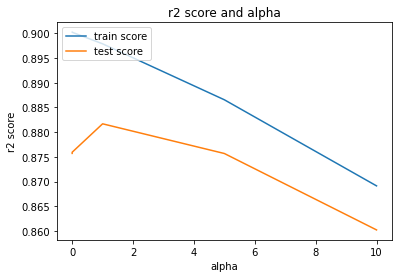

In [66]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.8816890627876225


**From both the plots we can see optimal value as `1`.**

In [68]:
# ridge regression without tuning hyper parameter
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8971057864004892
0.8433019938438864


In [69]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10666.569),
 ('MSSubClass', 49471.625),
 ('LotFrontage', 119220.668),
 ('LotArea', 49242.509),
 ('OverallQual', 42755.828),
 ('OverallCond', 105779.944),
 ('MasVnrArea', 114879.537),
 ('BsmtFinSF1', 92594.763),
 ('BsmtFinSF2', 32595.348),
 ('BsmtUnfSF', -55521.115),
 ('TotalBsmtSF', -11123.87),
 ('CentralAir', 29358.707),
 ('1stFlrSF', 22158.794),
 ('2ndFlrSF', -26427.226),
 ('LowQualFinSF', -14714.83),
 ('GrLivArea', 18912.466),
 ('BsmtFullBath', -26277.31),
 ('BsmtHalfBath', -38728.765),
 ('FullBath', -38861.524),
 ('HalfBath', -42631.624),
 ('BedroomAbvGr', 23992.458),
 ('KitchenAbvGr', 3791.87),
 ('TotRmsAbvGrd', -11578.795),
 ('Fireplaces', -18118.326),
 ('GarageCars', -47171.92),
 ('GarageArea', 28653.071)]

With optimal value of 1. The R2 scores are - 
- Train - `0.8971057864004892`

- Test - `0.8433019938438864`

This shows model is not overfitted.

### Subjective question - 1 

**Changes in the model if we double the value of alpha.**

In [70]:
# ridge regression without tuning hyper parameter
ridge1 = Ridge(alpha=2.0)
ridge1.fit(X_train,y_train)

# predict
y_train_pred = ridge1.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge1.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8951645237232095
0.8419688013765487


In [71]:
model_parameters = list(ridge1.coef_)
model_parameters.insert(0, ridge1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 15548.927),
 ('MSSubClass', 50105.596),
 ('LotFrontage', 117845.29),
 ('LotArea', 45145.357),
 ('OverallQual', 43226.822),
 ('OverallCond', 99633.421),
 ('MasVnrArea', 109528.895),
 ('BsmtFinSF1', 88885.342),
 ('BsmtFinSF2', 36041.41),
 ('BsmtUnfSF', -53818.044),
 ('TotalBsmtSF', -6654.475),
 ('CentralAir', 28456.041),
 ('1stFlrSF', 16242.176),
 ('2ndFlrSF', -25516.014),
 ('LowQualFinSF', -9311.853),
 ('GrLivArea', 13972.221),
 ('BsmtFullBath', -19221.014),
 ('BsmtHalfBath', -37990.205),
 ('FullBath', -38368.465),
 ('HalfBath', -42778.312),
 ('BedroomAbvGr', 12696.756),
 ('KitchenAbvGr', -1466.864),
 ('TotRmsAbvGrd', -8922.714),
 ('Fireplaces', -9453.236),
 ('GarageCars', -31233.515),
 ('GarageArea', 21632.328)]

In [72]:
# coefficients for optimal value of alpha = 1
ridge.fit(X_train, y_train)
ridge.coef_

array([ 49471.62489222, 119220.66766232,  49242.50941933,  42755.828245  ,
       105779.94363464, 114879.53659566,  92594.76255618,  32595.34827161,
       -55521.11530104, -11123.87034557,  29358.70684448,  22158.79364124,
       -26427.22571857, -14714.83014409,  18912.46615023, -26277.30959331,
       -38728.76492762, -38861.52352547, -42631.6239472 ,  23992.45755144,
         3791.87037145, -11578.79518002, -18118.32622242, -47171.9196126 ,
        28653.07079713])

In [73]:
#Check R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8419688013765487


In [74]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:163825860884.485
AIC:19400.816308600704
BIC:19893.179171414547


In [75]:
#Predictor Variables from the Model built using Lasso Regression:
print(list(zip(cols, model_parameters)))

[('constant', 15548.927), ('MSSubClass', 50105.596), ('LotFrontage', 117845.29), ('LotArea', 45145.357), ('OverallQual', 43226.822), ('OverallCond', 99633.421), ('MasVnrArea', 109528.895), ('BsmtFinSF1', 88885.342), ('BsmtFinSF2', 36041.41), ('BsmtUnfSF', -53818.044), ('TotalBsmtSF', -6654.475), ('CentralAir', 28456.041), ('1stFlrSF', 16242.176), ('2ndFlrSF', -25516.014), ('LowQualFinSF', -9311.853), ('GrLivArea', 13972.221), ('BsmtFullBath', -19221.014), ('BsmtHalfBath', -37990.205), ('FullBath', -38368.465), ('HalfBath', -42778.312), ('BedroomAbvGr', 12696.756), ('KitchenAbvGr', -1466.864), ('TotRmsAbvGrd', -8922.714), ('Fireplaces', -9453.236), ('GarageCars', -31233.515), ('GarageArea', 21632.328)]


## Conclusion

Optimal values of alpha are found out to be - 
- Lasso regression - 20
- Ridge regression - 1

The R2 scores of Lasso regression are - 
- Train - `0.8931745482517399`

- Test - `0.8422883803488737`

The R2 scores of Ridge regression are - 
- Train - `0.8971057864004892`

- Test - `0.8433019938438864`


**Based on both the Ridge and Lasso Models, the key predictor variables for predicting the Sale Price of Houses in Australia are as follows:**
` 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea' `

**The answer to how well these variables describe the price of a house, is determined from the value of the R2-score and AIC, BIC values**
- The model prediction capability is more than 80%. Which is Good. R2 score provides a measure of how well future samples are likely to be predicted by the model. 
- In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. 
    - In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
    - In this model, the AIC is 19000 whic is high. 
    - Also the BIC which provides a measure of penalty for additional variables. It is 18000 again high.